## Plot mutation prediction results

Notebook parameters:
* SIG_ALPHA (float): significance cutoff (after FDR correction)

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir, 'gene').resolve()
# set significance cutoff after FDR correction
SIG_ALPHA = 0.001

In [3]:
# load raw data
results_df = au.load_stratified_prediction_results(results_dir, 'gene')
print(results_df.shape)
results_df.head()

(9288, 9)


,auroc,aupr,identifier,training_data,signal,seed,data_type,fold,experiment
0,0.56379,0.165090,MAP3K1,expression,shuffled,42,train,0,gene
1,0.46135,0.086369,MAP3K1,expression,shuffled,42,test,0,gene
2,0.48896,0.069915,MAP3K1,expression,shuffled,42,cv,0,gene
3,0.50000,0.078323,MAP3K1,expression,shuffled,42,train,1,gene
4,0.50000,0.071259,MAP3K1,expression,shuffled,42,test,1,gene


In [4]:
expression_df = (
    results_df[results_df.training_data == 'expression']
        .drop(columns=['training_data'])
)
expression_results_df = au.compare_results(expression_df,
                                           identifier='identifier',
                                           metric='aupr',
                                           correction=True,
                                           correction_method='fdr_bh',
                                           correction_alpha=SIG_ALPHA,
                                           verbose=True)
expression_results_df.rename(columns={'identifier': 'gene'}, inplace=True)
expression_results_df.sort_values(by='p_value').head(n=10)

shapes unequal for CBL, skipping
shapes unequal for CDC73, skipping
shapes unequal for HNF1A, skipping
shapes unequal for MLH1, skipping
shapes unequal for PTPN11, skipping


,gene,delta_mean,p_value,corr_pval,reject_null
15,BRAF,0.617245,1.121428e-19,1.087785e-17,True
25,CTNNB1,0.593111,3.305822e-18,1.301609e-16,True
28,EGFR,0.584966,4.025594e-18,1.301609e-16,True
72,PIK3CA,0.345058,5.853374e-18,1.419443e-16,True
5,ARID1A,0.424040,1.412938e-16,2.741100e-15,True
93,TP53,0.404853,3.483038e-16,5.630911e-15,True
3,APC,0.582659,8.595405e-16,1.191078e-14,True
54,KRAS,0.474406,1.442342e-15,1.748840e-14,True
22,CIC,0.545687,7.647812e-15,8.242642e-14,True
30,ERBB2,0.571202,1.846692e-14,1.791291e-13,True


In [5]:
methylation_df = (
    results_df[results_df.training_data == 'methylation']
        .drop(columns=['training_data'])
)
methylation_results_df = au.compare_results(methylation_df,
                                            identifier='identifier',
                                            metric='aupr',
                                            correction=True,
                                            correction_method='fdr_bh',
                                            correction_alpha=SIG_ALPHA,
                                            verbose=True)
methylation_results_df.rename(columns={'identifier': 'gene'}, inplace=True)
methylation_results_df.sort_values(by='p_value').head(n=10)

shapes unequal for CBL, skipping
shapes unequal for CDC73, skipping
shapes unequal for HIST1H3B, skipping
shapes unequal for PTPN11, skipping
shapes unequal for RNF43, skipping
shapes unequal for SETBP1, skipping
shapes unequal for SETD2, skipping
shapes unequal for SF3B1, skipping
shapes unequal for SMAD2, skipping
shapes unequal for SMAD4, skipping
shapes unequal for SMARCA4, skipping
shapes unequal for SMO, skipping
shapes unequal for SOX9, skipping
shapes unequal for SPOP, skipping
shapes unequal for STAG2, skipping
shapes unequal for STK11, skipping
shapes unequal for TET2, skipping
shapes unequal for TP53, skipping
shapes unequal for TSC1, skipping
shapes unequal for TSHR, skipping
shapes unequal for VHL, skipping


,gene,delta_mean,p_value,corr_pval,reject_null
3,APC,0.532541,1.014534e-16,8.217726e-15,True
15,BRAF,0.484979,6.861149e-15,2.778766e-13,True
46,IDH1,0.438526,3.573120e-14,9.647425e-13,True
28,EGFR,0.277732,4.820419e-13,9.761349e-12,True
54,KRAS,0.241381,2.722260e-11,4.410061e-10,True
21,CDKN2A,0.196310,3.906670e-11,5.274004e-10,True
69,NRAS,0.291291,6.223951e-11,7.202001e-10,True
5,ARID1A,0.290481,9.159015e-11,9.273503e-10,True
25,CTNNB1,0.342773,1.120363e-09,1.008326e-08,True
73,PIK3CA,0.154935,2.442815e-09,1.909558e-08,True


500

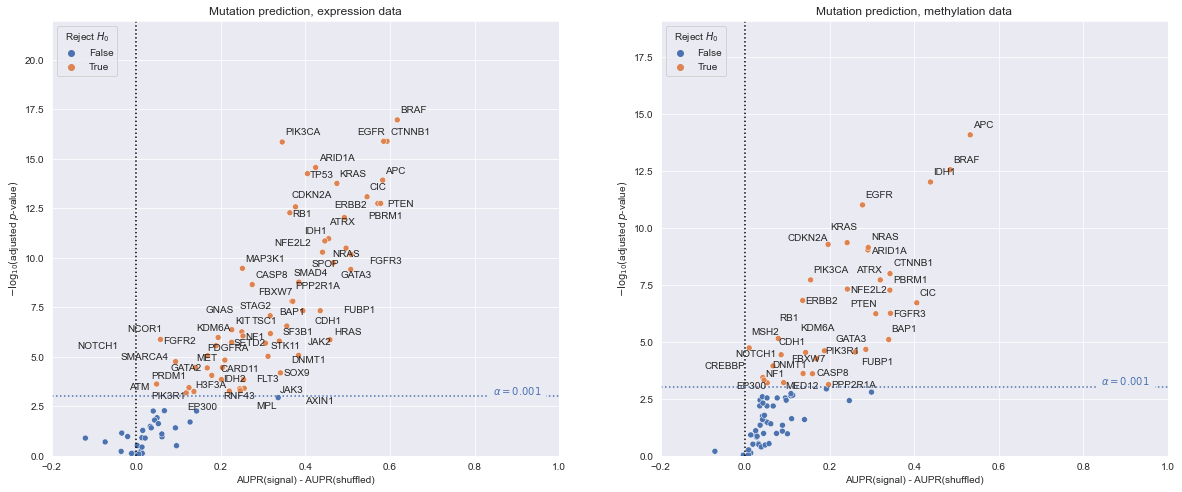

In [6]:
expression_results_df['nlog10_p'] = -np.log10(expression_results_df.corr_pval)
methylation_results_df['nlog10_p'] = -np.log10(methylation_results_df.corr_pval)

sns.set({'figure.figsize': (20, 8)})
fig, axarr = plt.subplots(1, 2)

# plot mutation prediction from expression, in a volcano-like plot
sns.scatterplot(data=expression_results_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                hue_order=[False, True], ax=axarr[0])
# add vertical line at 0
axarr[0].axvline(x=0, linestyle=':', color='black')
# add horizontal line at statistical significance threshold
l = axarr[0].axhline(y=-np.log10(SIG_ALPHA), linestyle=':')
# label horizontal line with significance threshold
# (matplotlib makes this fairly difficult, sadly)
axarr[0].text(0.9, -np.log10(SIG_ALPHA)+0.3,
              r'$\alpha = {}$'.format(SIG_ALPHA),
              va='center', ha='center', color=l.get_color(),
              backgroundcolor=axarr[0].get_facecolor())
axarr[0].set_xlabel('AUPR(signal) - AUPR(shuffled)')
axarr[0].set_ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
axarr[0].set_xlim((-0.2, 1.0))
axarr[0].set_ylim((0, expression_results_df.nlog10_p.max() + 5))
axarr[0].legend(title=r'Reject $H_0$', loc='upper left')
axarr[0].set_title(r'Mutation prediction, expression data')

# plot mutation prediction from methylation, same as above
sns.scatterplot(data=methylation_results_df, x='delta_mean', y='nlog10_p', hue='reject_null',
                hue_order=[False, True], ax=axarr[1])
axarr[1].axvline(x=0, linestyle=':', color='black')
l = axarr[1].axhline(y=-np.log10(SIG_ALPHA), linestyle=':')
axarr[1].text(0.9, -np.log10(SIG_ALPHA)+0.3,
              r'$\alpha = {}$'.format(SIG_ALPHA),
              va='center', ha='center', color=l.get_color(),
              backgroundcolor=axarr[0].get_facecolor())
axarr[1].set_xlabel('AUPR(signal) - AUPR(shuffled)')
axarr[1].set_ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
axarr[1].set_xlim((-0.2, 1.0))
axarr[1].set_ylim((0, methylation_results_df.nlog10_p.max() + 5))
axarr[1].legend(title=r'Reject $H_0$', loc='upper left')
axarr[1].set_title(r'Mutation prediction, methylation data')

def label_points(x, y, gene, sig, ax):
    text_labels = []
    a = pd.DataFrame({'x': x, 'y': y, 'gene': gene, 'sig': sig})
    for i, point in a.iterrows():
        if point['y'] > -np.log10(SIG_ALPHA):
            text_labels.append(
                ax.text(point['x']+.005, point['y']+.2, str(point['gene']))
            )
    return text_labels

# label genes and adjust text to not overlap
# automatic alignment isn't perfect, can align by hand in inkscape if necessary
text_labels_expression = label_points(expression_results_df['delta_mean'],
                                      expression_results_df['nlog10_p'],
                                      expression_results_df.gene,
                                      expression_results_df.reject_null,
                                      axarr[0])
adjust_text(text_labels_expression, ax=axarr[0], avoid_points=False, avoid_self=False)

text_labels_methylation = label_points(methylation_results_df['delta_mean'],
                                       methylation_results_df['nlog10_p'],
                                       methylation_results_df.gene,
                                       methylation_results_df.reject_null,
                                       axarr[1])
adjust_text(text_labels_methylation, ax=axarr[1], avoid_points=False, avoid_self=False)

In [7]:
compare_results_df = au.compare_results(methylation_df,
                                        pancancer_df=expression_df,
                                        identifier='identifier',
                                        metric='aupr',
                                        correction=True,
                                        correction_method='fdr_bh',
                                        correction_alpha=SIG_ALPHA,
                                        verbose=True)
compare_results_df.rename(columns={'identifier': 'gene'}, inplace=True)
compare_results_df.head()

,gene,delta_mean,p_value,corr_pval,reject_null
0,ACVR1B,-0.021661,2.131075e-01,3.019022e-01,False
1,GNAS,0.190533,2.250910e-06,1.569959e-05,True
2,DNMT1,0.192777,1.028688e-03,3.278942e-03,False
3,SMAD4,0.247415,6.540700e-07,6.065013e-06,True
4,RB1,0.280694,2.272926e-11,5.795962e-10,True


In [ ]:
compare_results_df['nlog10_p'] = -np.log10(compare_results_df.corr_pval)

sns.set({'figure.figsize': (12, 8)})
sns.scatterplot(data=compare_results_df, x='delta_mean', y='nlog10_p', hue='reject_null')
plt.axvline(x=0, linestyle=':', color='black')
l = plt.axhline(y=-np.log10(SIG_ALPHA), linestyle=':')
plt.text(0.9, -np.log10(SIG_ALPHA)+0.05,
         r'$\alpha = {}$'.format(SIG_ALPHA),
         va='center', ha='center', color=l.get_color(),
         backgroundcolor=plt.gca().get_facecolor())
plt.xlabel('AUPR(expression) - AUPR(methylation)')
plt.ylabel(r'$-\log_{10}($adjusted $p$-value$)$')
plt.xlim((-1.0, 1.0))
plt.legend(title=r'Reject $H_0$', loc='upper left')
plt.title(r'Cancer type prediction, expression vs. methylation')

def label_points(x, y, gene, sig, ax):
    text_labels = []
    a = pd.DataFrame({'x': x, 'y': y, 'gene': gene, 'sig': sig})
    for i, point in a.iterrows():
        if point['y'] > -np.log10(0.001):
            text_labels.append(
                ax.text(point['x']+.005, point['y']+.1, str(point['gene']))
            )
        elif point['x'] < 0.0:
            # align these left, otherwise can't read
            text_labels.append(
                ax.text(point['x']-.01, point['y']+.1, str(point['gene']),
                        ha='right', va='bottom')
            )
    return text_labels

text_labels = label_points(compare_results_df['delta_mean'],
                           compare_results_df['nlog10_p'],
                           compare_results_df.gene,
                           compare_results_df.reject_null,
                           plt.gca())
adjust_text(text_labels, ax=plt.gca(), avoid_points=False)